#  Determination of the prospective tariff for the Megaline telecom company

Megaline Company is a federal mobile operator. Customers are offered two tariff plans: Smart and Ultra. In order to adjust the advertising budget, the commercial department wants to understand which tariff brings more money.
It is necessary to make a preliminary analysis of tariffs on a small sample of customers. At your disposal are the data of 500 Megaline users: who they are, where they come from, what tariff they use, how many calls and messages each one sent in 2018. It is necessary to analyze customer behavior and conclude which tariff is better.


#### Description of the plans

Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.
- Smart
Monthly charge: 550 RUB
500 monthly minutes, 50 texts, and 15 GB of data
After exceeding the package limits:
    - 1 minute: 3 RUB
    - 1 text message: 3 RUB
    - 1 GB of data: 200 RUB
- Ultra
Monthly charge: 1950 RUB
3000 monthly minutes, 1000 text messages, and 30 GB of data
After exceeding the package limits:
    - 1 minute: 1 RUB
    - 1 text message: 1 RUB
    - 1 GB of data: 150 RUB

## Step 1. Learning General Information

In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats as st

In [2]:
users = pd.read_csv('users.csv')  
calls = pd.read_csv('calls.csv')  
messages = pd.read_csv('messages.csv')  
internet = pd.read_csv('internet.csv')  
tariffs = pd.read_csv('tariffs.csv')  

In [3]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
users.isnull().sum() 

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

At first glance, there is nothing wrong with the data in the table. There are no missing values. If the churn_date column the value is missing - the tariff was still valid at the moment of data upload.

In [6]:
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [7]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y.%m.%d')

In [8]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [9]:
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [10]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


There are no missing values in the table.

In [11]:
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [12]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [13]:
tariffs.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [14]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Almost all tables have complete data. Except for the users table. Gaps may be related to
that the upload contains data of users with the current tariff.
There is data that needs to be replaced with the datetime type.
A large number of zero values in the columns with the call duration and the number of consumed megabytes, these data should be rounded up.

## Step 2. Data preprocessing 

Let's replace the date data type from object to datetime and add a month column for further analysis.

In [15]:
def date_dt_month(df):
    for df in df:
        for column in df.columns:
            if 'date' in column:
                df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')
                df['month'] = df[column].apply(lambda x: x.month)

In [16]:
date_dt_month([users, calls, messages, internet])

In [17]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


In [18]:
calls['duration'] = calls['duration'].apply(np.ceil)
calls['duration'] = calls['duration'].astype('int')
internet['mb_used'] = internet['mb_used'].apply(np.ceil) 
internet['mb_used'] = internet['mb_used'].astype('int')

In order to decide what to do with zero calls, let's build a histogram:

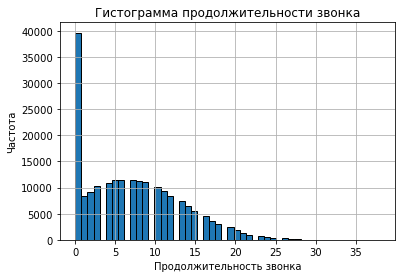

In [19]:
calls['duration'].plot( kind='hist', ec='black', bins=50, grid = True) 
plt.title('Гистограмма продолжительности звонка')
plt.xlabel('Продолжительность звонка')
plt.ylabel('Частота')
plt.show()

The histogram shows that there are about 40,000 such calls. Zero values are not needed in the analysis, so we delete them.

In [20]:
calls['duration'] = calls['duration'].replace(0, np.NaN)
calls = calls.dropna()

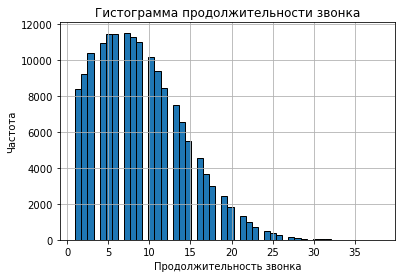

In [21]:
calls['duration'].plot(kind='hist', ec='black', bins=50, grid = True) 
plt.title('Гистограмма продолжительности звонка')
plt.xlabel('Продолжительность звонка')
plt.ylabel('Частота')
plt.show() 

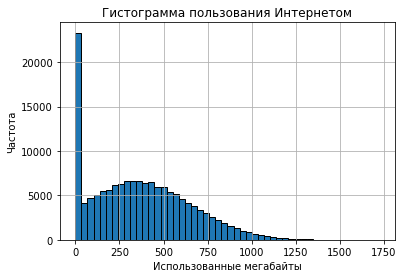

In [22]:
internet['mb_used'].plot(kind='hist', ec='black', bins=50, grid = True) 
plt.title('Гистограмма пользования Интернетом')
plt.xlabel('Использованные мегабайты')
plt.ylabel('Частота')
plt.show()

In [23]:
internet['mb_used']= internet['mb_used'].replace(0, np.NaN)
internet = internet.dropna()

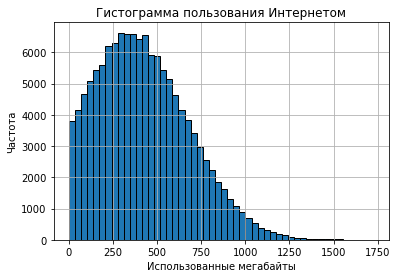

In [24]:
internet['mb_used'].plot(kind='hist', ec='black', bins=50, grid = True) 
plt.title('Гистограмма пользования Интернетом')
plt.xlabel('Использованные мегабайты')
plt.ylabel('Частота')
plt.show()

#### Duration
round off the conversation due to the fact that "Megaline" always rounds up the values of minutes and megabytes. If the user has spoken for only 1 second, a whole minute is counted in the tariff.
The appearance of zero values in the call duration column may be due to the fact that the subscriber rejected the call or missed it. Also, the reason may be a busy line. This data does not consume the tariff limit and does not affect the analysis in any way, so it is better to remove it from the table.


Let's count for  for each user:
- number of calls made and spent minutes of conversation by months;
- the number of sent messages by month;
- the volume of consumed Internet traffic by months;
- monthly revenue from each user (subtract the free limit from the total number of calls, messages and Internet traffic; multiply the remainder by the value from the tariff plan; add the subscription fee corresponding to the tariff plan).

In [25]:
calls_use = calls.groupby(['user_id','month'])['duration'].agg(['count', 'sum']) 

In [26]:
calls_use

count    sum
user_id month              
1000    5         17  159.0
        6         28  172.0
        7         41  340.0
        8         42  408.0
        9         46  466.0
...              ...    ...
1498    10        30  247.0
1499    9          8   70.0
        10        44  449.0
        11        62  612.0
        12        56  492.0

[3168 rows x 2 columns]

In [27]:
message_use = messages.groupby(['user_id','month'])['id'].count() 

In [28]:
message_use

user_id  month
1000     5        22
         6        60
         7        75
         8        81
         9        57
                  ..
1498     10       42
1499     9        11
         10       48
         11       59
         12       66
Name: id, Length: 2717, dtype: int64

In [29]:
internet_use = internet.groupby(['user_id','month'])['mb_used'].sum()

In [30]:
internet_use

user_id  month
1000     5         2256.0
         6        23257.0
         7        14016.0
         8        14070.0
         9        14581.0
                   ...   
1498     10       20604.0
1499     9         1848.0
         10       17809.0
         11       17984.0
         12       13077.0
Name: mb_used, Length: 3201, dtype: float64

In [31]:
tariff_city = users[['user_id','tariff','city']] 

In [32]:
tariff_city

,user_id,tariff,city
0,1000,ultra,Краснодар
1,1001,smart,Москва
2,1002,smart,Стерлитамак
3,1003,ultra,Москва
4,1004,ultra,Новокузнецк
...,...,...,...
495,1495,ultra,Иркутск
496,1496,smart,Вологда
497,1497,smart,Челябинск
498,1498,smart,Владикавказ


For calculate let's create a table with information about users and their actions with the tariff.

In [33]:
new_table = pd.concat([calls_use, message_use, internet_use], axis=1)
new_table = new_table.reset_index()
new_table = new_table.merge(tariff_city, on='user_id', how='left') 
new_table['mb_used'] = (new_table['mb_used']).apply(np.ceil)
new_table.columns = ['user_id', 'month', 'calls_count', 'calls_minutes', 'messages', 'internet', 'tariff', 'city']
new_table.head(10)

,user_id,month,calls_count,calls_minutes,messages,internet,tariff,city
0,1000,5,17.0,159.0,22.0,2256.0,ultra,Краснодар
1,1000,6,28.0,172.0,60.0,23257.0,ultra,Краснодар
2,1000,7,41.0,340.0,75.0,14016.0,ultra,Краснодар
3,1000,8,42.0,408.0,81.0,14070.0,ultra,Краснодар
4,1000,9,46.0,466.0,57.0,14581.0,ultra,Краснодар
5,1000,10,44.0,350.0,73.0,14717.0,ultra,Краснодар
6,1000,11,37.0,338.0,58.0,14768.0,ultra,Краснодар
7,1000,12,38.0,333.0,70.0,9827.0,ultra,Краснодар
8,1001,11,45.0,430.0,NaN,18452.0,smart,Москва
9,1001,12,47.0,414.0,NaN,14053.0,smart,Москва


Now let's calculate the monthly revenue from each user:

In [34]:
def calls_over(row):
    if row['tariff'] == 'smart':
        result = row['calls_minutes'] - 500
        return np.where(result > 0, result, 0)
    else:
        result = row['calls_minutes'] - 3000
        return np.where(result > 0, result, 0)
    
    
def sms_over(row):
    if row['tariff'] == 'smart':
        result = row['messages'] - 50
        return np.where(result > 0, result, 0)
    else:
        result = row['messages'] - 1000
        return np.where(result > 0, result, 0)
    

def internet_over(row):
    if row['tariff'] == 'smart':
        result = row['internet'] - 15 * 1024
        return np.where(result > 0, result, 0)
    else:
        result = row['internet'] - 30 * 1024
        return np.where(result > 0, result, 0)
    
    
def month_income(row):
    result = 550
    if row['tariff'] == 'smart':
        result += (row['minutes_over']) * 3
        result += row['messages_over'] * 3
        result += round(np.ceil(row['mbs_over']/1024)) * 200
        return result
    
    else:
        result += 1400
        result += np.ceil(row['minutes_over']) * 1
        result += row['messages_over'] * 1
        result += round(np.ceil(row['mbs_over']/1024)) * 150
        return result

Additionally, we create columns with information about calls, sms, spent megabytes of overpack, a column with the calculation of revenue. The missing values was replased on  zero. We also create tariff tables.

In [35]:
new_table['minutes_over'] = new_table.apply(calls_over, axis=1)
new_table['messages_over'] = new_table.apply(sms_over, axis=1)
new_table['mbs_over'] = new_table.apply(internet_over, axis=1)
new_table['income'] = new_table.apply(month_income, axis=1) 
new_table_smart= new_table[new_table['tariff']=='smart']
new_table_ultra= new_table[new_table['tariff']=='ultra']
new_table.head(20) 

,user_id,month,calls_count,calls_minutes,messages,internet,tariff,city,minutes_over,messages_over,mbs_over,income
0,1000,5,17.0,159.0,22.0,2256.0,ultra,Краснодар,0.0,0.0,0.0,1950.0
1,1000,6,28.0,172.0,60.0,23257.0,ultra,Краснодар,0.0,0.0,0.0,1950.0
2,1000,7,41.0,340.0,75.0,14016.0,ultra,Краснодар,0.0,0.0,0.0,1950.0
3,1000,8,42.0,408.0,81.0,14070.0,ultra,Краснодар,0.0,0.0,0.0,1950.0
4,1000,9,46.0,466.0,57.0,14581.0,ultra,Краснодар,0.0,0.0,0.0,1950.0
5,1000,10,44.0,350.0,73.0,14717.0,ultra,Краснодар,0.0,0.0,0.0,1950.0
6,1000,11,37.0,338.0,58.0,14768.0,ultra,Краснодар,0.0,0.0,0.0,1950.0
7,1000,12,38.0,333.0,70.0,9827.0,ultra,Краснодар,0.0,0.0,0.0,1950.0
8,1001,11,45.0,430.0,NaN,18452.0,smart,Москва,0.0,0.0,3092.0,1350.0
9,1001,12,47.0,414.0,NaN,14053.0,smart,Москва,0.0,0.0,0.0,550.0


In [36]:
new_table.isnull().sum() 

user_id            0
month              0
calls_count       46
calls_minutes     46
messages         497
internet          13
tariff             0
city               0
minutes_over       0
messages_over      0
mbs_over           0
income             0
dtype: int64

##### The reason for the occurrence is not clear. Replacing the missing values  with the median or mean for this sample will not be entirely correct, due to different user activity. Since these are insignificant relative to the entire sample, I replace them with zero. 

In [37]:
new_table = new_table.fillna(0)

In [38]:
new_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        3214 non-null   int64  
 1   month          3214 non-null   int64  
 2   calls_count    3214 non-null   float64
 3   calls_minutes  3214 non-null   float64
 4   messages       3214 non-null   float64
 5   internet       3214 non-null   float64
 6   tariff         3214 non-null   object 
 7   city           3214 non-null   object 
 8   minutes_over   3214 non-null   float64
 9   messages_over  3214 non-null   float64
 10  mbs_over       3214 non-null   float64
 11  income         3214 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 326.4+ KB


## Step 3. Data Analysis 

Description of operator customer behavior based on the sample 

In [39]:
describe_mins = new_table.pivot_table(index='tariff', values ='calls_minutes', aggfunc=['mean', 'median', 'var', 'std']).round().astype('int')
describe_sms = new_table.pivot_table(index='tariff', values ='messages', aggfunc=['mean', 'median', 'var', 'std']).round().astype('int')
describe_gbs = new_table.pivot_table(index='tariff', values ='internet', aggfunc=['mean', 'median', 'std']).round().astype('int')
describe = pd.concat([describe_mins, describe_sms, describe_gbs], axis=1)
describe  

,mean,median,var,std,mean,median,var,std,mean,median,std
,calls_minutes,calls_minutes,calls_minutes,calls_minutes,messages,messages,messages,messages,internet,internet,internet
tariff,,,,,,,,,,,
smart,418,422,36219,190,33,28,797,28,16229,16531,5878
ultra,527,518,100874,318,49,38,2285,48,19487,19324,10096


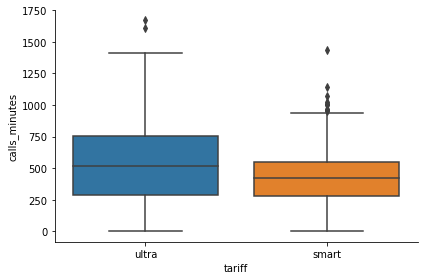

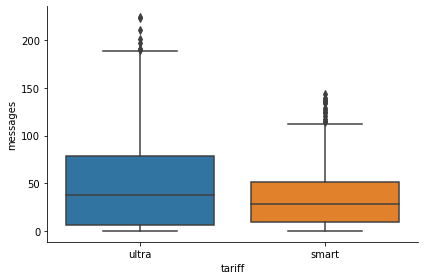

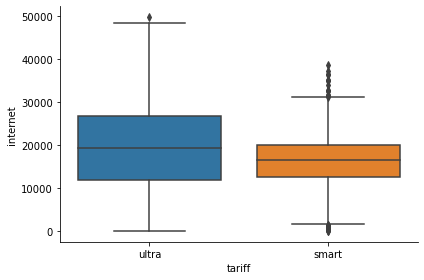

In [40]:
for column in ['calls_minutes', 'messages', 'internet']:    
    sns.catplot(x='tariff', y=column ,kind='box',
            height=4, aspect=1.5, data=new_table, orient='v')

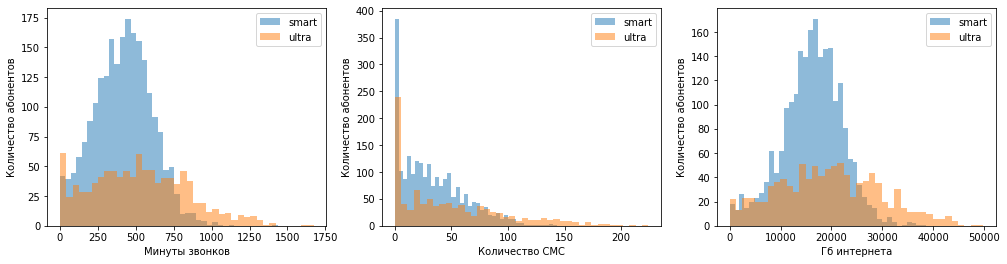

In [41]:
columns = ['calls_minutes', 'messages', 'internet']
titles = ['Минуты звонков', 'Количество СМС', 'Гб интернета']
tariffs = ['smart', 'ultra']
bins = 40
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (17,4))

for i in range(len(columns)):
    for j in range(len(tariffs)):
        ax = (new_table[new_table['tariff'] == tariffs[j]][columns[i]]
              .plot(kind='hist', ax=axes[i], bins = bins, alpha = 0.5))
        ax.set(xlabel=titles[i], ylabel="Количество абонентов")
        ax.legend(tariffs)       

We have calculated the revenue for each tariff. Constructed histograms for the use of operator services.
In terms of call duration, messages sent, megabytes spent, the "Ultra" tariff has much higher variance and standard deviation than the "Smart" tariff. This is probably due to the large restrictions within the Smart tariff.

The duration of the call, the use of the Internet have a normal distribution, and for the sent distributions it is close to the Poisson distribution.

For calls and SMS on the “Smart” tariff, the median is slightly lower than the amount included in the tariff. The limits on the Ultra tariff are several times higher, and the median differs from the Smart tariff not so much.
For the Internet, the situation is different: the median for tariffs is 17 and 19 GB, and there are many users using more than included in the tariff.

## Step 4. Hypothesis Testing 

### Hypothesis 1. 
The average revenue of users of the tariffs "Ultra" and "Smart" is different

Let's formulate hypotheses. 
- H₀- null hypothesis: 
Average revenue for Ultra and Smart tariffs does not differ 
- H₁ - alternative hypothesis: 
Average revenue for Ultra and Smart tariffs differs 

Threshold alpha, critical level of statistical significance = 5%.

In [42]:
x = new_table[new_table['tariff'] == 'smart']['income']
variance_estimate = np.var(x, ddof=1)
print(variance_estimate)

673931.3213632498


In [43]:
x1 = new_table[new_table['tariff'] == 'ultra']['income']
variance_estimate = np.var(x1, ddof=1)
print(variance_estimate)

143491.24055961063


In [44]:
alpha = 0.05
results = st.ttest_ind(
    new_table[new_table['tariff'] == 'smart']['income'], 
    new_table[new_table['tariff'] == 'ultra']['income'],
    equal_var=False
   )
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.7240946993530856e-246
Отвергаем нулевую гипотезу


Got a p-value equal to 2.724;
The average revenue for Ultra and Smart tariffs is not the same, therefore, the average revenue for users of Ultra and Smart tariffs really differs and our hypothesis was confirmed.

In [45]:
new_table.pivot_table(index='tariff', values='income', aggfunc='median')

,income
tariff,
smart,1038.0
ultra,1950.0


Для второй гипотезы используем аналогичные параметры и действия. 

### Hypothesis 2.
The average revenue of users from Moscow 
differs from the revenue of users from other regions


- H₀- null hypothesis: 
Average revenue in Moscow does not differ from revenue from other regions 
- H₁ - alternative hypothesis: 
Average revenue in Moscow differs from revenue from other regions 

Threshold alpha, critical level of statistical significance = 5%

In [46]:
moscow= new_table[new_table['city']=='Москва']
other= new_table[new_table['city']!='Москва']

In [47]:
import numpy as np
y = other['income']
variance_estimate = np.var(y, ddof=1)
print(variance_estimate)

656766.5955122621


In [48]:
import numpy as np
y1 = moscow['income']
variance_estimate = np.var(y1, ddof=1)
print(variance_estimate)

566183.0292184297


In [49]:

alpha = .05
results = st.ttest_ind(
    moscow['income'], 
    other['income'],
    equal_var=False
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5126564657748214
Не получилось отвергнуть нулевую гипотезу


- Got a p-value equal to 0.512;
- The average revenue in Moscow and St. Petersburg is not the same, with a probability of 25% such a difference can be obtained by chance;
- Thus, our hypothesis that the average revenue of users from Moscow differs from the revenue of users from other regions has not been confirmed.

In [50]:
new_table['moscow'] = np.where(new_table['city'] == 'Москва', 'Москва', 'Другой регион') 
new_table.pivot_table (index=['tariff', 'moscow'], values = 'income', aggfunc=['median'])

median
                      income
tariff moscow               
smart  Другой регион  1040.0
       Москва         1011.5
ultra  Другой регион  1950.0
       Москва         1950.0

Let's build histograms by revenue:
- total revenue by tariffs
- revenue in the context of Moscow and other regions

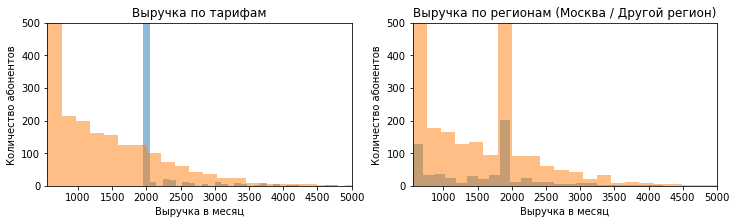

In [51]:
xlim = (550,5000)
ylim = (0,500)
bins = 30

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,3))

(new_table.query('tariff == "ultra"')['income']
 .plot(kind='hist', ax=axes[0], bins = bins, alpha = 0.5, xlim = xlim, ylim = ylim, title = 'Выручка по тарифам')
 .set(xlabel='Выручка в месяц', ylabel="Количество абонентов"))
(new_table.query('tariff == "smart"')['income']
 .plot(kind='hist', ax=axes[0], bins = bins, alpha = 0.5, xlim = xlim, ylim = ylim, title = 'Выручка по тарифам')
 .set(xlabel='Выручка в месяц', ylabel="Количество абонентов"))
(new_table.query('moscow == "Москва"')['income']
 .plot(kind='hist', ax=axes[1], bins = bins, alpha = 0.5, xlim = xlim, ylim = ylim, title = 'Выручка по регионам (Москва / Другой регион)')
 .set(xlabel='Выручка в месяц', ylabel="Количество абонентов"))
(new_table.query('moscow == "Другой регион"')['income']
 .plot(kind='hist', ax=axes[1], bins = bins, alpha = 0.5, xlim = xlim, ylim = ylim, title = 'Выручка по регионам (Москва / Другой регион)')
 .set(xlabel='Выручка в месяц', ylabel="Количество абонентов"))
plt.show()

The average revenue values for tariffs differ by almost 2 times.
The income of the super tariff is brought by the “Smart” tariff. This can be explained by the fact that users do not have enough of the limit included in the tariff, and they are ready to pay for the spent package.

Average revenue values for tariffs in Moscow and the regions practically do not differ. Subscribers of the "Smart" tariff in both regions overpay the super tariff.

## General conclusion

Let's calculate the share of average and total revenue by tariffs

In [52]:
print(new_table[new_table['tariff'] == 'ultra']['income'].mean() / new_table[new_table['tariff'] == 'smart']['income'].mean() - 1)
print(new_table[new_table['tariff'] == 'smart']['income'].sum() / new_table[new_table['tariff'] == 'ultra']['income'].sum() - 1)

0.5997243322000263
0.4145838235294117


According to the results of the statistical analysis, the proceeds for the Ultra tariff are higher than those for the Smart tariff. Despite the fact that many subscribers of this tariff go beyond the limit and overpay for it.
While the monthly cost of the Smart tariff is 550 rubles, users overpay 2 times due to overspending of the tariff plan, and on the Ultra tariff, users may not use up the entire package in a month.
- revenue per Ultra subscriber is higher than Smart (by 60%)
- revenue of Smart is generally higher than Ultra (41%) (probably due to the popularity of the tariff).

Average revenue from users in Moscow and the regions does not differ significantly.

#### Since the average subscriber of the Smart tariff uses the services of a super tariff and at the same time, the revenue from the Ultra tariff is higher, I would recommend Megaline to promote the Ultra tariff and attract more users from the Smart tariff. To do this, you can reduce the limits within the tariff, since users still do not spend it completely, and slightly reduce the subscription fee.
##### It would also be possible to offer the company the creation of a new intermediate tariff between "Smart" and "Ultra", in which the subscription fee would be higher than "Smart" and lower than "Ultra", but at the same time the users would have enough limit inside new tariff. Thus, the company would be able to attract new customers both from other operators and enable its users to use the new tariff.